<a href="https://colab.research.google.com/github/imasy36/Machine-Learning-with-python/blob/master/FMNIST_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# model to predict the category of cloth 
# dataset used F_MNIST_data
# author @imasy36

In [2]:
%matplotlib inline
from google.colab import files
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
#getting data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5))])
traindata = datasets.FashionMNIST('FMNIST_data/',train=True, download=True, transform=trans)
testdata = datasets.FashionMNIST('FMNIST_data/', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=True)

Extracting FMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FMNIST_data/FashionMNIST/raw


Extracting FMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FMNIST_data/FashionMNIST/raw


Extracting FMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FMNIST_data/FashionMNIST/raw




Extracting FMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FMNIST_data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


torch.Size([64, 1, 28, 28])


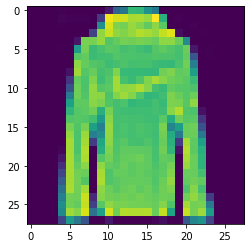

In [4]:
# verifying data
temp = iter(trainloader)
images, labels = temp.next()
print(images.size())
plt.imshow(images[4].numpy().squeeze())

In [5]:
# creating Model
from collections import OrderedDict
model = torch.nn.Sequential(OrderedDict([
            ('InputLayer',torch.nn.Linear(784,256)),
            ('ReLU1',torch.nn.ReLU()),
            ('HiddenLayer1',torch.nn.Linear(256,128)),
            ('ReLU2',torch.nn.ReLU()),
            ('HiddenLayer2',torch.nn.Linear(128,64)),
            ('ReLU3',torch.nn.ReLU()),
            ('OutputLayer',torch.nn.Linear(64,10)),
            ('Softmax',torch.nn.Softmax(dim=1)),                                       
]))
print(model)

Sequential(
  (InputLayer): Linear(in_features=784, out_features=256, bias=True)
  (ReLU1): ReLU()
  (HiddenLayer1): Linear(in_features=256, out_features=128, bias=True)
  (ReLU2): ReLU()
  (HiddenLayer2): Linear(in_features=128, out_features=64, bias=True)
  (ReLU3): ReLU()
  (OutputLayer): Linear(in_features=64, out_features=10, bias=True)
  (Softmax): Softmax(dim=1)
)


In [14]:
loss_fun = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # train [e=10,lr=0.01] -> [e=2,lr=0.1] -> [e=10,lr=0.01]

In [15]:
#training model
epochs = 10
running_loss = 0
steps = 0
print_step = 100
for e in range(epochs):
  for images, labels in trainloader:
    steps+=1
    images = images.resize_(images.size()[0], 784)
    output = model.forward(images)
    optimizer.zero_grad()
    loss = loss_fun(output, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if steps % print_step == 0:
      print("epochs {} of {} | running loss {}".format(e+1,epochs,running_loss/print_step))
      running_loss = 0


epochs 1 of 10 | running loss 1.6784722268581391
epochs 1 of 10 | running loss 1.6682626044750213
epochs 1 of 10 | running loss 1.673923978805542
epochs 1 of 10 | running loss 1.675249366760254
epochs 1 of 10 | running loss 1.673569792509079
epochs 1 of 10 | running loss 1.6826885092258452
epochs 1 of 10 | running loss 1.6685078811645508
epochs 1 of 10 | running loss 1.6834235346317292
epochs 1 of 10 | running loss 1.6776335859298706
epochs 2 of 10 | running loss 1.6720139813423156
epochs 2 of 10 | running loss 1.6699965333938598
epochs 2 of 10 | running loss 1.6814363527297973
epochs 2 of 10 | running loss 1.6712505757808684
epochs 2 of 10 | running loss 1.6692913889884948
epochs 2 of 10 | running loss 1.6708515763282776
epochs 2 of 10 | running loss 1.6726407063007356
epochs 2 of 10 | running loss 1.675166860818863
epochs 2 of 10 | running loss 1.676170928478241
epochs 3 of 10 | running loss 1.6762703204154967
epochs 3 of 10 | running loss 1.671150712966919
epochs 3 of 10 | running l

In [16]:
# testing data
steps = 0
acc = 0
print_step = 30
for images, labels in testloader:
  steps += 1
  images = images.resize_(images.size(0),784)
  with torch.no_grad() :
    output = model.forward(images)
  pr = torch.nn.functional.softmax(output, dim =1) 
  equal = (labels.data == pr.max(1)[1])
  acc += equal.type(torch.FloatTensor).mean()
  if steps%print_step == 0 :
    print("Accuracy : {}".format(acc/print_step))
    acc = 0

Accuracy : 0.7796875238418579
Accuracy : 0.7807291746139526
Accuracy : 0.7807291746139526
Accuracy : 0.7848958373069763
Accuracy : 0.7901041507720947


tensor(7)
Prediction : 7


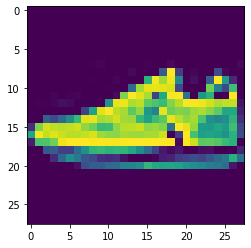

In [9]:
images, labels = next(iter(trainloader))
plt.imshow(images[0].numpy().squeeze())
print(labels[0])
ps = torch.nn.functional.softmax(model.forward(images.resize_(64,784)),dim=1)
print("Prediction : {}".format(ps.max(1)[1][0]))